In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
#from statsmodels.graphics.regressionplot import influence_plot 

In [2]:
df=pd.read_csv(r"D:\Excel R\Data Science Assignments\Multiple Linear Regression\50_startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#df=df.drop('State',axis=1)

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.shape

(50, 5)

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df=df.rename({'R&D Spend': 'R_D',
              'Administration': 'Admin',
             'Marketing Spend' : 'Marketspend',
             },axis=1)

In [10]:
df.describe()

,R_D,Admin,Marketspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.corr()

,R_D,Admin,Marketspend,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


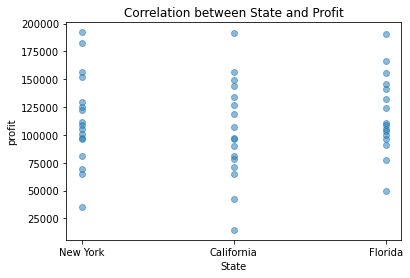

In [12]:
plt.scatter(df['State'],df['Profit'],alpha=0.5)
plt.title("Correlation between State and Profit")
plt.xlabel('State')
plt.ylabel('profit')
plt.show()

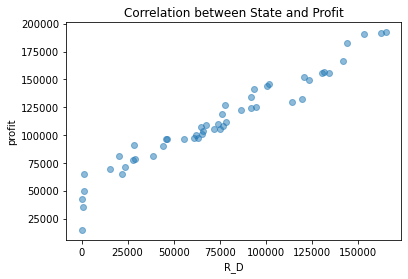

In [13]:
plt.scatter(df['R_D'],df['Profit'],alpha=0.5)
plt.title("Correlation between State and Profit")
plt.xlabel('R_D')
plt.ylabel('profit')
plt.show()

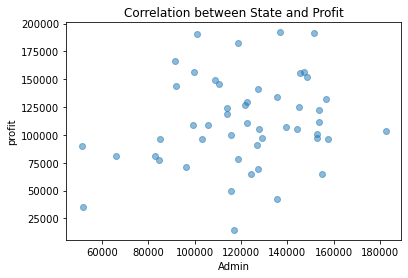

In [14]:
plt.scatter(df['Admin'],df['Profit'],alpha=0.5)
plt.title("Correlation between State and Profit")
plt.xlabel('Admin')
plt.ylabel('profit')
plt.show()

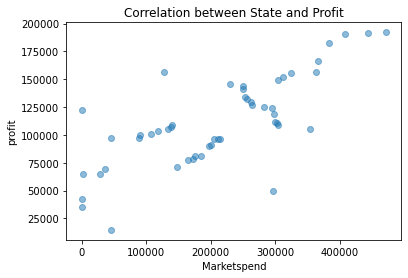

In [15]:
plt.scatter(df['Marketspend'],df['Profit'],alpha=0.5)
plt.title("Correlation between State and Profit")
plt.xlabel('Marketspend')
plt.ylabel('profit')
plt.show()

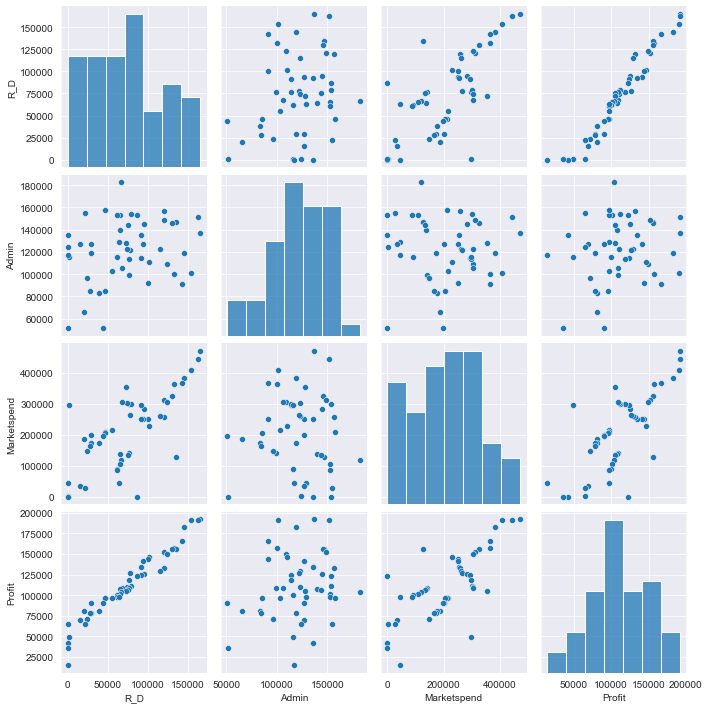

In [16]:
##Format the Plot baground and plot the Scatter plot between all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

Model

In [25]:
import statsmodels.formula.api as smf
model =smf.ols("Profit~R_D+Admin+Marketspend+State",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.34e-27
Time:                        10:52:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R_D                   0.8060      0.046     17.369      0.000       0.712       0.900
Admin                -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketspend           0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple  In-Significant Values so Check Individually by Using  Simple Linear Regression 

In [26]:
##MarketSpend Vs Profit
ms = smf.ols("Profit~Marketspend",data=df).fit()
ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 26 May 2021   Prob (F-statistic):           4.38e-10
Time:                        10:53:36   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept        6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
adm=smf.ols("Profit~Admin",data=df).fit()
adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.162
Time:                        10:55:15   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
rd=smf.ols("Profit~R_D",data=df).fit()
rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.50e-32
Time:                        10:55:47   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R_D            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
st=smf.ols("Profit~State",data=df).fit()
st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.567
Time:                        10:57:13   Log-Likelihood:                -600.05
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.039e+05   9861.636     10.536      0.000    8.41e+04    1.24e+05
State[T.Florida]   1.487e+04   1.42e+04      1.050      0.299   -1.36e+04    4.34e+04
State[T.New York]  9851.2712   1.39e+04      0.706      0.483   -1.82e+04    3.79e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## By combining Both profit Vs Admin  +  market Spend 

In [123]:
model1=smf.ols("Profit~Admin+Marketspend",data=df).fit()

In [124]:
model1.pvalues

Intercept      2.589341e-01
Admin          1.729198e-02
Marketspend    9.727245e-11
dtype: float64

In [125]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 19 May 2021   Prob (F-statistic):           2.50e-10
Time:                        16:14:09   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin           0.3237      0.131      2.468      0.017       0.060       0.588
Marketspend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
model1=smf.ols("Profit~R_D+Marketspend",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 19 May 2021   Prob (F-statistic):           2.16e-31
Time:                        16:15:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D             0.7966      0.041     19.266      0.000       0.713       0.880
Marketspend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
model2=smf.ols("Profit~Admin+R_D",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 19 May 2021   Prob (F-statistic):           7.29e-31
Time:                        16:16:22   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
R_D            0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculate Variance Inflation Factor 

In [109]:
#Vif for Admin
rsq_adm= smf.ols("Admin~R_D+Marketspend",data=df).fit().rsquared
vif_adm= 1/(1-rsq_adm)

#vif for R_D
rsq_rd=smf.ols("R_D~Admin+Marketspend",data=df).fit().rsquared
vif_rd= 1/(1-rsq_rd)

#vif for Marketspend
rsq_ms=smf.ols("Marketspend~R_D+Admin",data=df).fit().rsquared
vif_ms = 1/(1-rsq_ms)

In [120]:
## Sorting the Vif values in the data Frame
d1={"Variables":['Admin','marketspend','R_D'],'VIF':[vif_adm,vif_ms,vif_rd]}

In [121]:
##d1 placing in a Data Frame
vif_frame=pd.DataFrame(d1)

In [131]:
vif_frame

,Variables,VIF
0,Admin,1.175091
1,marketspend,2.326773
2,R_D,2.468903


# Resudial Analysis

Q-Q plot

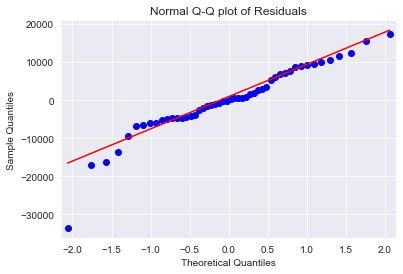

In [135]:
import statsmodels.api as sm
qqplot=sm .qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [146]:
list(np.where(model.resid<(-10000)))

[array([14, 15, 48, 49], dtype=int64)]

# Plot Homoscedascticity

In [149]:
def get_stand(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardized  Residuals')

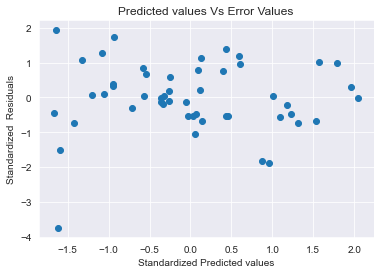

In [154]:
plt.scatter(get_stand(model.fittedvalues)
           ,get_stand(model.resid))
plt.title("Predicted values Vs Error Values")
plt.xlabel('Standardized Predicted values')
plt.ylabel('Standardized  Residuals')

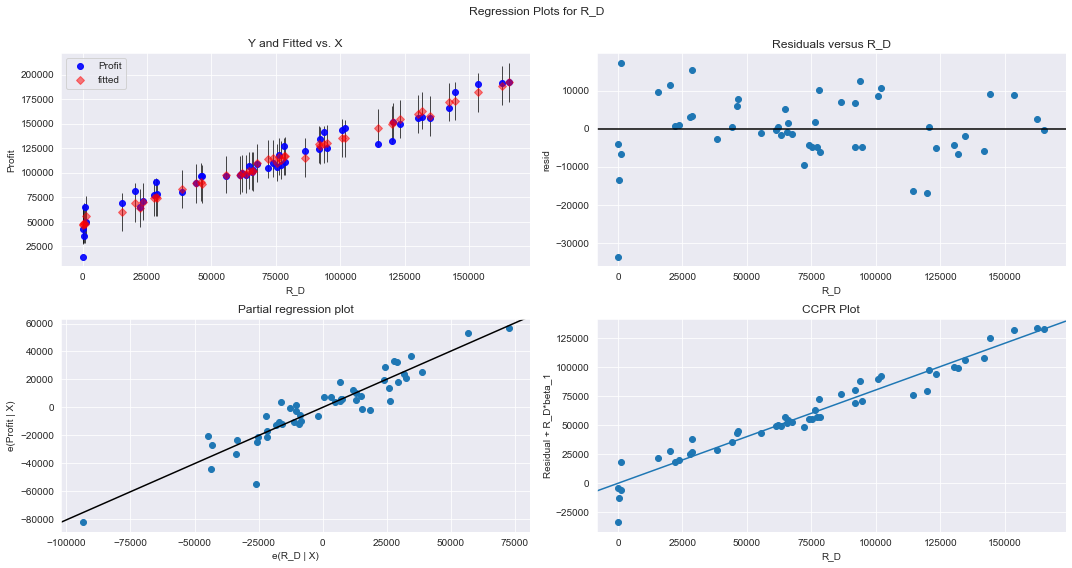

In [158]:
##Residuals vs Regressors 
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"R_D",fig=fig)
plt.show()

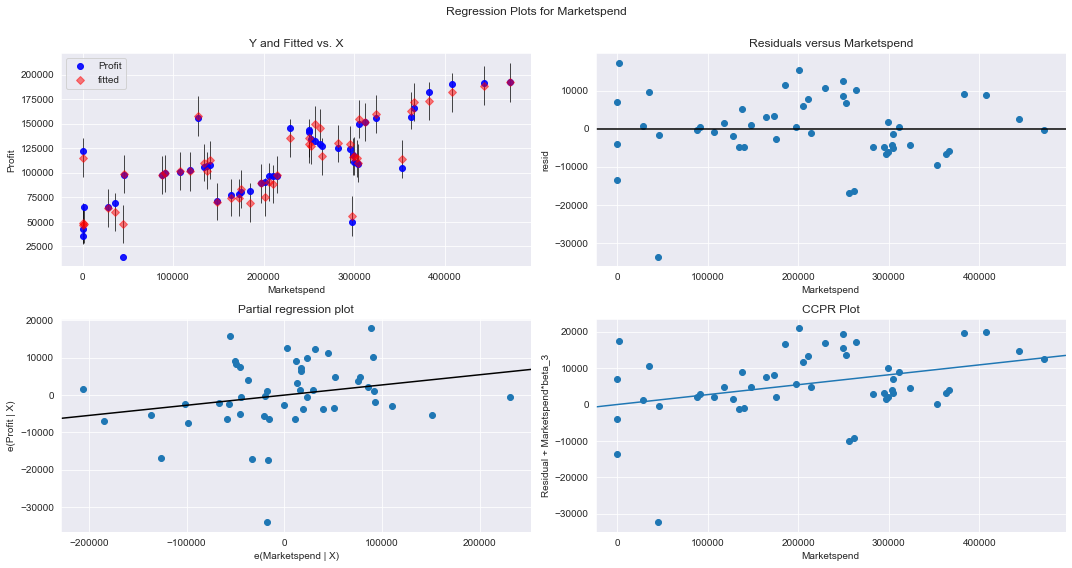

In [159]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketspend",fig=fig)
plt.show()

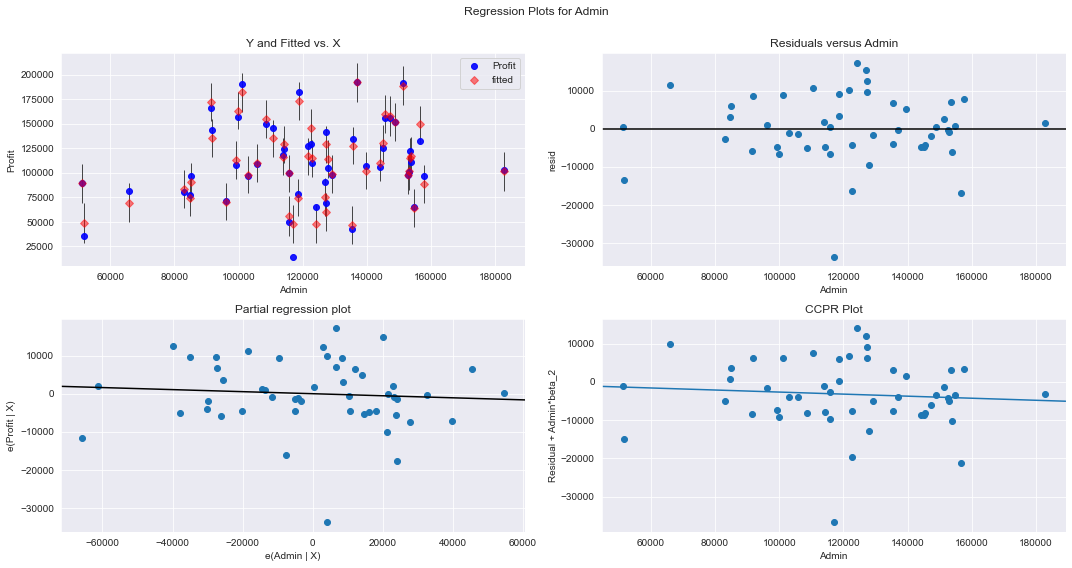

In [160]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

# Model Deletion Diagonstics

In [162]:
model_influence=model.get_influence()
(c,_) = model_influence.cooks_distance


In [ ]:
/*#vif for Admin
ad_vif=smf.ols("Admin~Profit+R_D+MS+St_C+St_F+St_NY",data=df).fit().rsquared
vif_ad= 1/(1-ad_vif)

ms_vif=smf.ols("MS~Profit+R_D+Admin+St_C+St_F+St_NY",data=df).fit().rsquared
vif_ms= 1/(1-ms_vif)

rd_vif=smf.ols("R_D~Profit+Admin+MS+St_C+St_F+St_NY",data=df).fit().rsquared
vif_rd= 1/(1-rd_vif)

stc_vif=smf.ols("St_C~Profit+R_D+MS+Admin+St_F+St_NY",data=df).fit().rsquared
vif_stc= 1/(1-stc_vif)

stf_vif=smf.ols("St_F~Profit+R_D+MS+St_C+Admin+St_NY",data=df).fit().rsquared
vif_stf= 1/(1-stf_vif)

stny_vif=smf.ols("St_NY~Profit+R_D+MS+St_C+St_F+Admin",data=df).fit().rsquared
vif_stny= 1/(1-stny_vif)



## Sorting Vif Values
d1={"Variables":['Admin','R_D','MS','St_C','St_F','St_NY'],'VIF':[vif_ad,vif_rd,vif_ms,vif_stc,vif_stf,vif_stny]}*/

In [152]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [153]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64